#PATTERN RECOGNITION PROJECT DETAILS
##SASHA ANNABEL
##NIM 22/496780/PA/21361

#EDA

##LIBRARIES INSTALLATION AND GOOGLE DRIVE

In [ ]:
!pip install librosa

In [ ]:
!pip install resampy
import resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.7 MB/s eta 0:00:00


In [ ]:
mount = 'content/drive/UrbanSound8K'

##AUDIO DATA EXPLORATION

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd ##to help display the wav recording file
import librosa
import librosa.display

In [ ]:
%cd /content/drive/MyDrive/UrbanSound8K

/content/drive/MyDrive/UrbanSound8K


In [ ]:
filename = '4201-3-2-0.wav'

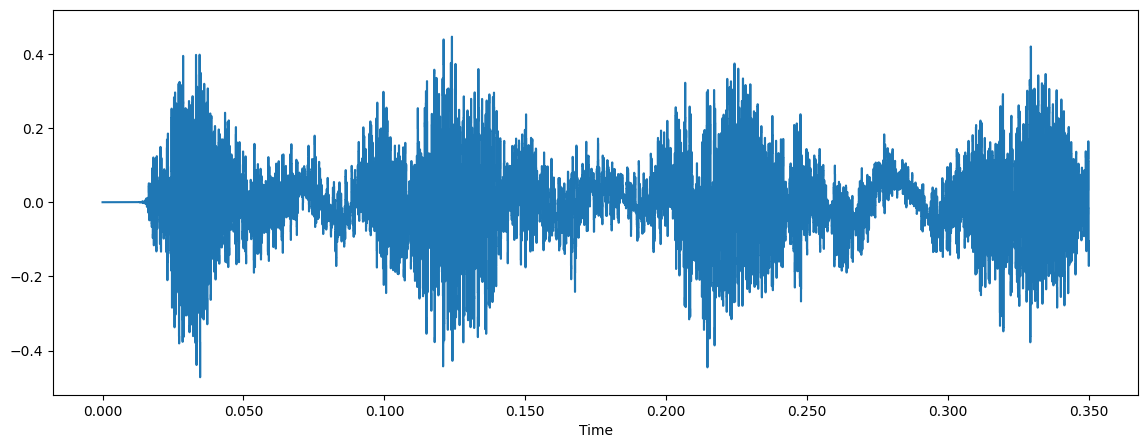

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
data

array([ 2.9802322e-08,  5.5879354e-09,  7.4505806e-09, ...,
       -1.1671661e-01, -1.7172906e-01, -1.0471621e-01], dtype=float32)

In [ ]:
import pandas as pd

metadata = pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head(15) #read the first 15 data

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

#DATA PRE-PROCESSING

##REVISIT DATA EXPLORATION

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


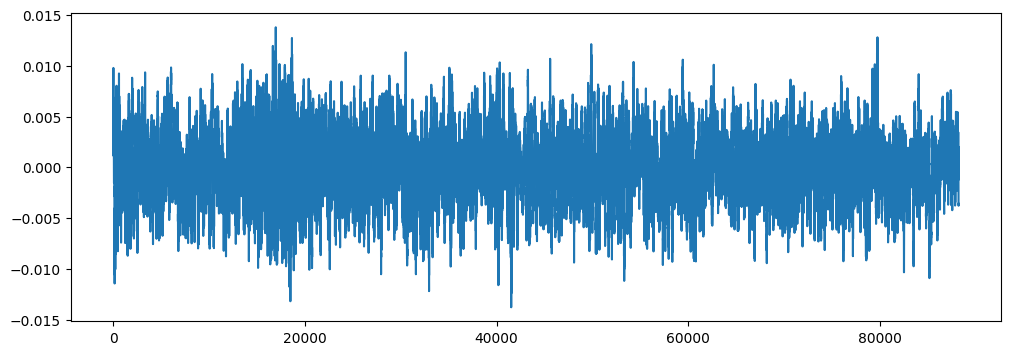

In [ ]:
import librosa
import matplotlib.pyplot as plt

audio_dataset_path = 'audio/'
audio_example_path = '100263-2-0-3.wav'
audio_example_data, audio_example_sample_rate = librosa.load(audio_example_path)
print(audio_example_data)

plt.figure(figsize=(12,4))
plt.plot(audio_example_data)

In [ ]:
mfccs = librosa.feature.mfcc(y = audio_example_data, sr = audio_example_sample_rate, n_mfcc = 40)
print(mfccs.shape)
print()
mfccs


(40, 173)



array([[-4.74862732e+02, -4.50886078e+02, -4.49053375e+02, ...,
        -4.76761566e+02, -4.73348694e+02, -4.90852692e+02],
       [ 1.15302643e+02,  1.11442482e+02,  1.11252251e+02, ...,
         1.11124985e+02,  1.10579689e+02,  1.02991508e+02],
       [-1.83261452e+01, -2.46824493e+01, -3.02597790e+01, ...,
        -8.23575974e+00, -9.06652641e+00, -4.50195885e+00],
       ...,
       [-2.87603712e+00, -3.24798489e+00, -4.89655590e+00, ...,
        -5.20241261e-01,  3.56725168e+00,  7.49375582e+00],
       [-4.29684758e-01, -5.88384807e-01, -8.17237675e-01, ...,
         1.83407784e-01,  7.67325163e-01,  2.71200132e+00],
       [-1.17806911e+00,  6.98090792e-01,  6.35215759e+00, ...,
        -2.62220168e+00, -4.79127264e+00, -3.18263483e+00]], dtype=float32)

##FEATURE EXTRACTION

In [ ]:
def extract_features(file):
  audio_results, sample_rate_results = librosa.load(audio_file_name,
  res_type='kaiser_fast')

  mfccs_features = librosa.feature.mfcc(y = audio_results,
  sr = sample_rate_results, n_mfcc = 40)
  mfccs_features_final = np.mean(mfccs_features.T, axis=0)
  return mfccs_features_final

In [ ]:
import os
import numpy as np
from tqdm import tqdm

##iterate through every audio file and extract the features
extracted_features=[]
for index,row in tqdm(metadata.iterrows()):
  audio_file_name = os.path.join(os.path.abspath(audio_dataset_path),
  'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))

  class_labels = row["class"]
  results_data = extract_features(audio_file_name)
  extracted_features.append([results_data, class_labels])

3555it [26:04,  2.85it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [58:53,  3.03it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [58:54,  3.27it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [1:01:34,  2.36it/s]


In [ ]:
features_df = pd.DataFrame(extracted_features, columns = ['feature','class'])
features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


#MODEL CREATION

##MODELLING WITH DEEP LEARNING

In [ ]:
#note : to split the dataset into independent and dependent dataset
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())

In [ ]:
#note : for simplicity, use Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels = y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1,
                               save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
212/219 [============================>.] - ETA: 0s - loss: 1.4216 - accuracy: 0.5096
Epoch 1: val_loss improved from inf to 1.22575, saving model to saved_models/audio_classification.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


219/219 [==============================] - 1s 5ms/step - loss: 1.4209 - accuracy: 0.5098 - val_loss: 1.2257 - val_accuracy: 0.5850
Epoch 2/150
214/219 [============================>.] - ETA: 0s - loss: 1.3914 - accuracy: 0.5234
Epoch 2: val_loss improved from 1.22575 to 1.20478, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.3905 - accuracy: 0.5236 - val_loss: 1.2048 - val_accuracy: 0.6165
Epoch 3/150
216/219 [============================>.] - ETA: 0s - loss: 1.3716 - accuracy: 0.5242
Epoch 3: val_loss improved from 1.20478 to 1.14613, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.3727 - accuracy: 0.5234 - val_loss: 1.1461 - val_accuracy: 0.6382
Epoch 4/150
209/219 [===========================>..] - ETA: 0s - loss: 1.3429 - accuracy: 0.5360
Epoch 4: val_loss did not improve from 1.14613
219/219 [==============================] - 1s 4ms/step 

##FOR EVALUATION : ACCURACY RESULTS

In [ ]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7773325443267822


In [ ]:
X_test[1]

array([-466.17957  ,    1.0950246,  -34.01389  ,   35.33935  ,
        -14.88148  ,  -19.12843  ,   -0.5816844,  -16.130579 ,
        -21.339075 ,    7.673635 ,  -29.164494 ,  -18.950253 ,
         -2.9579995,   -8.162331 ,  -15.153101 ,   -6.6048055,
         -7.5685973,    9.340646 ,   14.4331   ,   21.934181 ,
         20.861397 ,    1.3340123,  -19.228804 ,   -4.630231 ,
         -1.0564744,    3.215267 ,   -6.984281 ,  -16.414577 ,
        -10.0286455,   13.009955 ,    0.5334608,  -23.84339  ,
        -15.267321 ,    9.245735 ,   10.367627 ,   -0.583201 ,
         -1.2624054,   17.700016 ,   13.847463 ,   -5.1862826],
      dtype=float32)

In [ ]:
predict_x = model.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
classes_x

55/55 [==============================] - 0s 2ms/step


array([5, 3, 4, ..., 1, 9, 5])

#CLASSIFICATION TESTINGS : THREE NEW AUDIO

##FUNCTIONS FOR TESTING

In [ ]:
import numpy as np
import librosa

def test_new_audio(test_file):
  test_audio, test_audio_sample_rate = librosa.load(test_file, res_type='kaiser_fast')
  mfccs_ftrs = librosa.feature.mfcc(y=test_audio, sr=test_audio_sample_rate, n_mfcc=40)
  mfccs_ftrs_final = np.mean(mfccs_ftrs.T, axis=0)

  mfccs_ftrs_final = mfccs_ftrs_final.reshape(1, -1)
  predicted_probs = model.predict(mfccs_ftrs_final)

  #note : convert probabilities to class labels, and take the class
  #with highest probability
  threshold = 0.5
  predicted_labels = (predicted_probs > threshold).astype(int)
  predicted_labels = np.argmax(predicted_probs, axis=1)

  return predicted_labels

In [ ]:
def print_classification_result(predicted_labels, actual_class):
  print("Predicted labels:")
  print(predicted_labels)

  #note : to convert predicted labels to class names
  prediction_class = labelencoder.inverse_transform(predicted_labels.flatten())
  print("Model-predicted class of the audio:")
  print(prediction_class)

  print("Actual class of the audio:")
  print(actual_class)

##NEW AUDIO INPUT --> CLASSIFICATION RESULTS

In [ ]:
print("Classification Results For New Audio Data EXAMPLE 1")
print()

audio1_test_file = '/content/drive/MyDrive/UrbanSound8K/newaudio_dog_bark.wav'
actual_class = "dog_bark"

print("File name of raw new audio : newaudio_dog_bark.wav")
print()
predicted_labels = test_new_audio(audio1_test_file)
print_classification_result(predicted_labels,actual_class)

Classification Results For New Audio Data EXAMPLE 1

File name of raw new audio : newaudio_dog_bark.wav

1/1 [==============================] - 0s 25ms/step
Predicted labels:
[3]
Model-predicted class of the audio:
['dog_bark']
Actual class of the audio:
dog_bark


In [ ]:
print("Classification Results For New Audio Data EXAMPLE 2")
print()

audio2_test_file = '/content/drive/MyDrive/UrbanSound8K/newaudio_vehicle_horn.wav'
actual_class = "car_horn"

print("File name of raw new audio : newaudio_vehicle_horn.wav")
print()
predicted_labels = test_new_audio(audio2_test_file)
print_classification_result(predicted_labels,actual_class)

Classification Results For New Audio Data EXAMPLE 2

File name of raw new audio : newaudio_vehicle_horn.wav

1/1 [==============================] - 0s 37ms/step
Predicted labels:
[1]
Model-predicted class of the audio:
['car_horn']
Actual class of the audio:
car_horn


In [ ]:
print("Classification Results For New Audio Data EXAMPLE 3")
print()

audio3_test_file = '/content/drive/MyDrive/UrbanSound8K/newaudio_construction_hammer.wav'
actual_class = "jackhammer"

print("File name of raw new audio : newaudio_construction_hammer.wav")
print()
predicted_labels = test_new_audio(audio3_test_file)
print_classification_result(predicted_labels,actual_class)

Classification Results For New Audio Data EXAMPLE 3

File name of raw new audio : newaudio_construction_hammer.wav

1/1 [==============================] - 0s 29ms/step
Predicted labels:
[7]
Model-predicted class of the audio:
['jackhammer']
Actual class of the audio:
jackhammer
